# **Clasificación con SVM: Detección de Cáncer de Mama.**
En este ejercicio, voy a utilizar el algoritmo de Máquinas de Soporte Vectorial (SVM, *Support Vector Machine*) para clasificar tumores en benignos o malignos utilizando el conjunto de datos Breast Cancer Wisconsin de Scikit-Learn.





## **Cargar y visualizar los datos.**
El dataset contiene información sobre 569 tumores de mama con 30 características extraídas de imágenes médicas.

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el conjunto de datos de cáncer de mama
cancer = datasets.load_breast_cancer()
X = cancer.data  # Características
y = cancer.target  # 0 = Maligno, 1 = Benigno

# Convertir a DataFrame
df = pd.DataFrame(X, columns=cancer.feature_names)
df['clase'] = y  # Agregar la columna de etiquetas

# Mostrar las primeras filas
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,clase
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

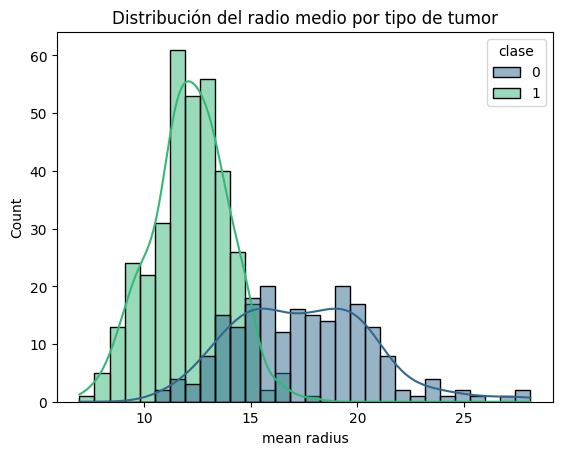

In [ ]:
# Visualizar la distribución de una característica
sns.histplot(data=df, x="mean radius", hue="clase", bins=30, kde=True, palette="viridis")
plt.title("Distribución del radio medio por tipo de tumor")
plt.show()

## **Entrenar el modelo.**
Se entrena el modelo con el algoritmo SVM. Dividimos los datos en entrenamiento y prueba, luego entrenamos un SVM con un kernel radial (RBF).

In [ ]:
# Dividir los datos en 80% entrenamiento y 20% prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo SVM
svm_model = SVC(kernel = 'rbf', C = 1.0, gamma = 'scale')  # Kernel RBF para problemas no lineales
svm_model.fit(X_train, y_train)

# Hacer predicciones
y_pred = svm_model.predict(X_test)

Precisión del modelo SVM: 0.95

Reporte de clasificación:
              precision    recall  f1-score   support

           0       1.00      0.86      0.93        43
           1       0.92      1.00      0.96        71

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



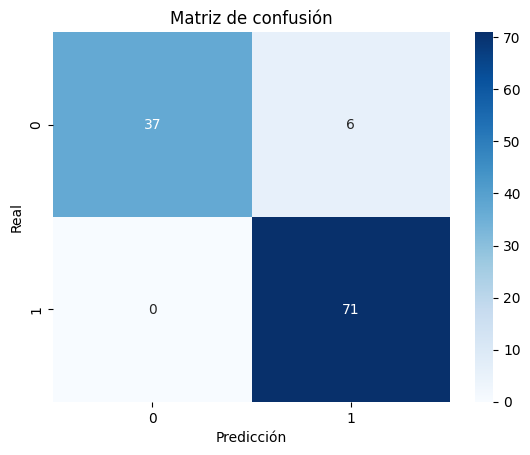

In [ ]:
# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo SVM: {accuracy:.2f}")

# Mostrar métricas detalladas
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

# Matriz de confusión
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de confusión")
plt.show()

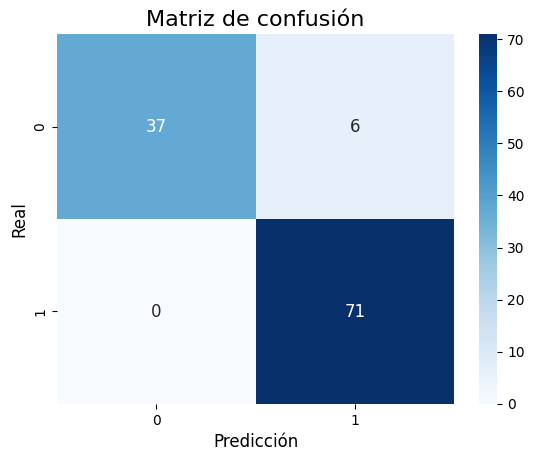

In [ ]:
# Matriz de confusión
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, annot_kws={"size": 12}, fmt="d", cmap="Blues")
plt.title("Matriz de confusión", fontsize = 16)
plt.xlabel("Predicción", fontsize = 12)
plt.ylabel("Real", fontsize = 12)
plt.show()

Si el modelo tiene una precisión superior al 95%, significa que es muy bueno distinguiendo entre tumores benignos y malignos.

Si queremos mejorar el rendimiento, podemos:

✅ Ajustar el hiperparámetro C (mayor C reduce errores en entrenamiento).

✅ Cambiar el kernel (linear, poly, sigmoid) según la complejidad de los datos.

✅ Normalizar los datos para mejorar la convergencia del modelo.



In [ ]:
# Dividir los datos en 80% entrenamiento y 20% prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo SVM con el kernel RBF
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_model.fit(X_train, y_train)

# Hacer predicciones
y_pred = svm_model.predict(X_test)

Precisión del modelo SVM: 0.95

Reporte de clasificación:
              precision    recall  f1-score   support

           0       1.00      0.86      0.93        43
           1       0.92      1.00      0.96        71

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



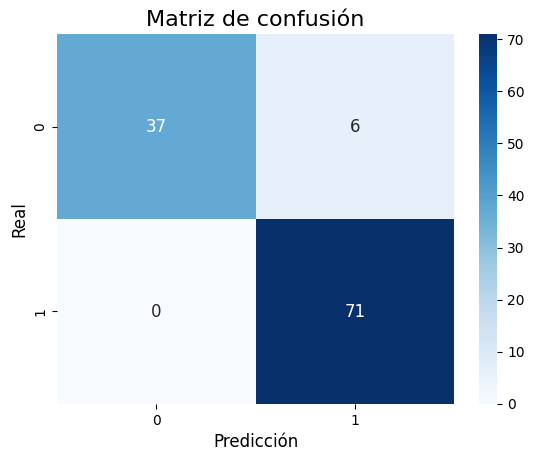

In [ ]:
# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo SVM: {accuracy:.2f}")

# Mostrar métricas
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

# Matriz de confusión
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, annot_kws = {"size": 12}, fmt="d", cmap="Blues")
plt.title("Matriz de confusión", fontsize = 16)
plt.xlabel("Predicción", fontsize = 12)
plt.ylabel("Real", fontsize = 12)

plt.show()

In [ ]:
# Clasificar el nuevo vector

datos_prueba = np.array([[
    17.99,  # Radio medio
    10.38,  # Textura media
    122.80, # Perímetro medio
    1001.0, # Área media
    0.1184, # Suavidad media
    0.2776, # Compacticidad media
    0.3001, # Concavidad media
    0.1471, # Puntos cóncavos medios
    0.2419, # Simetría media
    0.07871, # Dimensión fractal media
    1.095,  # Radio SE
    0.9053, # Textura SE
    8.589,  # Perímetro SE
    153.4,  # Área SE
    0.006399, # Suavidad SE
    0.04904,  # Compacticidad SE
    0.05373,  # Concavidad SE
    0.01587,  # Puntos cóncavos SE
    0.03003,  # Simetría SE
    0.006193, # Dimensión fractal SE
    25.38,   # Radio peor
    17.33,   # Textura peor
    184.60,  # Perímetro peor
    2019.0,  # Área peor
    0.1622,  # Suavidad peor
    0.6656,  # Compacticidad peor
    0.7119,  # Concavidad peor
    0.2654,  # Puntos cóncavos peor
    0.4601,  # Simetría peor
    0.11890  # Dimensión fractal peor
]])

prediccion = svm_model.predict(datos_prueba)

# Mostrar la predicción
if prediccion == 1:
    print("El tumor es maligno.")
else:
    print("El tumor es benigno.")

El tumor es benigno.


Conclusión
Este SVM ayuda a los médicos a identificar si un tumor es benigno o maligno basándose en sus características, ofreciendo un modelo eficiente para diagnóstico médico. 🚀


In [ ]:
df.head()